In [74]:
library('tidyverse')
library('ez')
library('WRS2')

In [108]:
dmn_recr = read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/dmn_recruit_o.csv')
dmn_integ = read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/dmn_integr_o.csv')
fpn_recr = read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/fpn_recruit_o.csv')


In [109]:
dmn_recr_tidy = gather(dmn_recr, key = 'ses', 'DMN_recr', -sub, -group)
dmn_integ_tidy = gather(dmn_integ, key = 'ses', 'DMN_integ', -sub, -group)
fpn_recr_tidy = gather(fpn_recr, key = 'ses', 'FPN_recr', -sub, -group)


In [110]:
dmn = left_join(dmn_integ_tidy, dmn_recr_tidy)
dmn = left_join(dmn, fpn_recr_tidy)
dmn$ses = factor(dmn$ses, labels = c('ses-1', 'ses-2', 'ses-3', 'ses-4'))

Joining, by = c("sub", "group", "ses")
Joining, by = c("sub", "group", "ses")


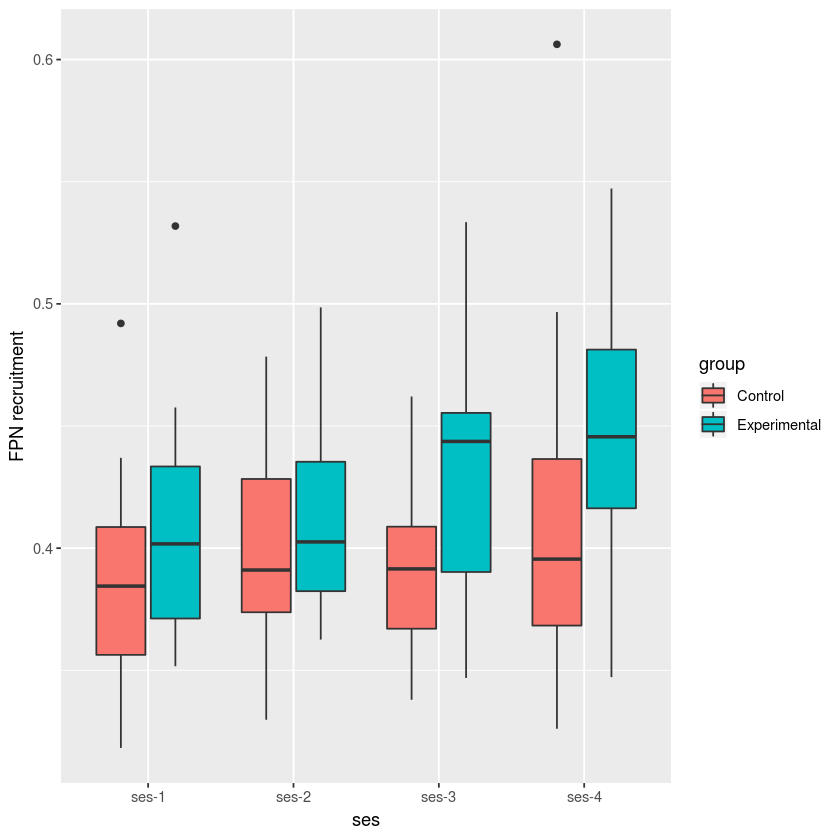

In [115]:
dmn %>% 
    filter(!(sub %in% dualnback_exclude)) %>%
    ggplot(aes(ses, FPN_recr, fill = group)) + geom_boxplot() + ylab('FPN recruitment')

In [107]:
dmn %>% filter(sub != 'sub-041') %>% ezANOVA(DMN_recr, within = ses, between = group, wid = sub)

$ANOVA
     Effect DFn DFd         F            p p<.05        ges
2     group   1  44  7.453140 9.072849e-03     * 0.07484063
3       ses   3 132 10.373236 3.552657e-06     * 0.10965998
4 group:ses   3 132  1.677582 1.749159e-01       0.01952972

$`Mauchly's Test for Sphericity`
     Effect         W          p p<.05
3       ses 0.7204865 0.01560157     *
4 group:ses 0.7204865 0.01560157     *

$`Sphericity Corrections`
     Effect       GGe        p[GG] p[GG]<.05       HFe        p[HF] p[HF]<.05
3       ses 0.8360232 1.734832e-05         * 0.8906401 1.021995e-05         *
4 group:ses 0.8360232 1.838791e-01           0.8906401 1.809032e-01

In [68]:
dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50')

In [93]:
bwtrim(FPN_recr ~ group*ses, id = sub, data = dmn1, tr = 0.2)

Call:
bwtrim(formula = FPN_recr ~ group * ses, id = sub, data = dmn1, 
    tr = 0.2)

            value p.value
ses        3.4590  0.0283
group     29.3538  0.0000
ses:group  3.7419  0.0210


In [86]:
sppbi(DMN_recr ~ group*ses, sub, dmn, est = "mom", nboot = 5000)


Call:
sppbi(formula = DMN_recr ~ group * ses, id = sub, data = dmn, 
    est = "mom", nboot = 5000)

Test statistics:
             Estimate
ses-1-ses-2 -0.009587
ses-1-ses-3  0.018449
ses-1-ses-4  0.025006
ses-2-ses-3  0.015004
ses-2-ses-4  0.035884
ses-3-ses-4  0.011503

Test whether the corrresponding population parameters are the same:
p-value: 0.4784 


In [99]:
dmn %>% filter(DMN_recr > 0.6)

sub,group,ses,DMN_integ,DMN_recr,FPN_recr
sub-41,Control,ses-4,0.2021034,0.6071344,0.65072
